In [2]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [3]:


df = pd.read_excel("year-1972.xlsx")

In [4]:
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1972,17693,93,17,3502
1,1972,17418,72,39,3509
2,1972,18067,297,20,3540
3,1972,17924,135,36,3539
4,1972,17170,63,27,3519
...,...,...,...,...,...
1812,1972,17718,75,25,3543
1813,1972,17809,346,34,3503
1814,1972,17533,331,16,3551
1815,1972,17308,214,27,3534


In [5]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1817, 5)


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1817 entries, 0 to 1816
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1817 non-null   int64
 1   Maximum length (m))  1817 non-null   int64
 2   Recession(m),        1817 non-null   int64
 3   Rate/yr(m)           1817 non-null   int64
 4   Snout altitude (m)   1817 non-null   int64
dtypes: int64(5)
memory usage: 71.1 KB


In [7]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [8]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1817


In [9]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [10]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [11]:

df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1972,17693,93,17,3502
1,1972,17418,72,39,3509
2,1972,18067,297,20,3540
3,1972,17924,135,36,3539
4,1972,17170,63,27,3519


In [12]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,-0.0022,0.0183,-0.0215
"Recession(m),",NaN,-0.0022,1.0000,0.0171,0.0152
Rate/yr(m),NaN,0.0183,0.0171,1.0000,-0.0208
Snout altitude (m),NaN,-0.0215,0.0152,-0.0208,1.0000


In [13]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Rate/yr(m)             0.0183
Recession(m),         -0.0022
Snout altitude (m)    -0.0215
Year                      NaN
Name: Maximum length (m)), dtype: float64

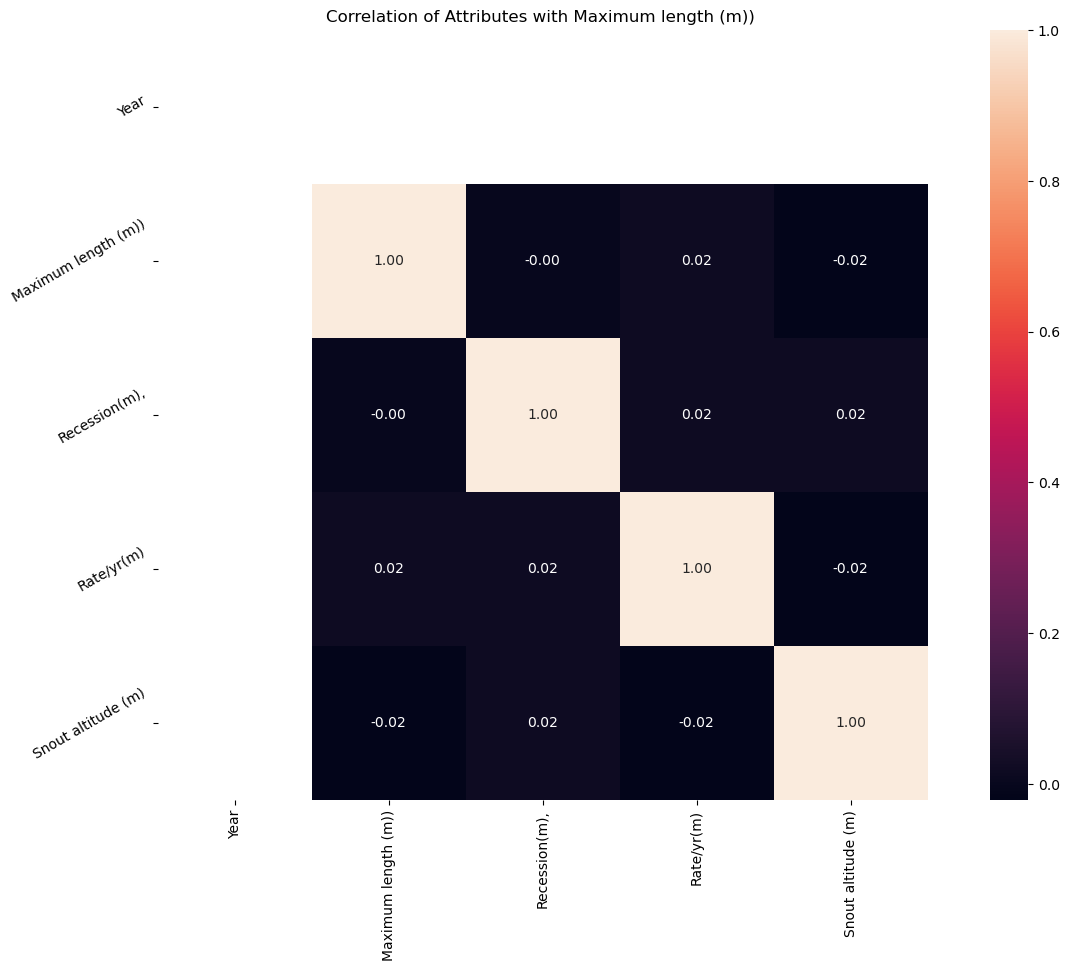

In [14]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [15]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [16]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,817.0000","1,817.0000","1,817.0000","1,817.0000","1,817.0000"
mean,"1,972.0000","17,536.3588",216.0660,27.3919,"3,532.1767"
std,0.0000,299.1901,127.6629,8.7698,20.5101
min,"1,972.0000","17,035.0000",0.0000,13.0000,"3,496.0000"
25%,"1,972.0000","17,276.0000",104.0000,20.0000,"3,515.0000"
50%,"1,972.0000","17,536.0000",218.0000,27.0000,"3,532.0000"
75%,"1,972.0000","17,790.0000",323.0000,35.0000,"3,550.0000"
max,"1,972.0000","18,067.0000",440.0000,42.0000,"3,567.0000"


In [17]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

Year
1972   1.0000
Name: count, dtype: float64

Recession(m),
350   0.0072
73    0.0066
54    0.0061
380   0.0061
246   0.0055
       ...  
273   0.0006
97    0.0006
183   0.0006
344   0.0006
153   0.0006
Name: count, Length: 432, dtype: float64

Rate/yr(m)
16   0.0396
25   0.0391
17   0.0374
31   0.0374
40   0.0369
19   0.0363
42   0.0363
41   0.0363
37   0.0358
30   0.0352
39   0.0347
29   0.0347
13   0.0341
15   0.0341
22   0.0336
23   0.0330
33   0.0330
18   0.0325
36   0.0325
20   0.0325
26   0.0319
14   0.0319
21   0.0319
32   0.0314
28   0.0303
35   0.0292
27   0.0286
24   0.0286
34   0.0259
38   0.0253
Name: count, dtype: float64

Snout altitude (m)
3540   0.0209
3526   0.0198
3536   0.0187
3559   0.0182
3531   0.0176
        ...  
3499   0.0094
3502   0.0094
3546   0.0088
3558   0.0077
3496   0.0033
Name: count, Length: 72, dtype: float64



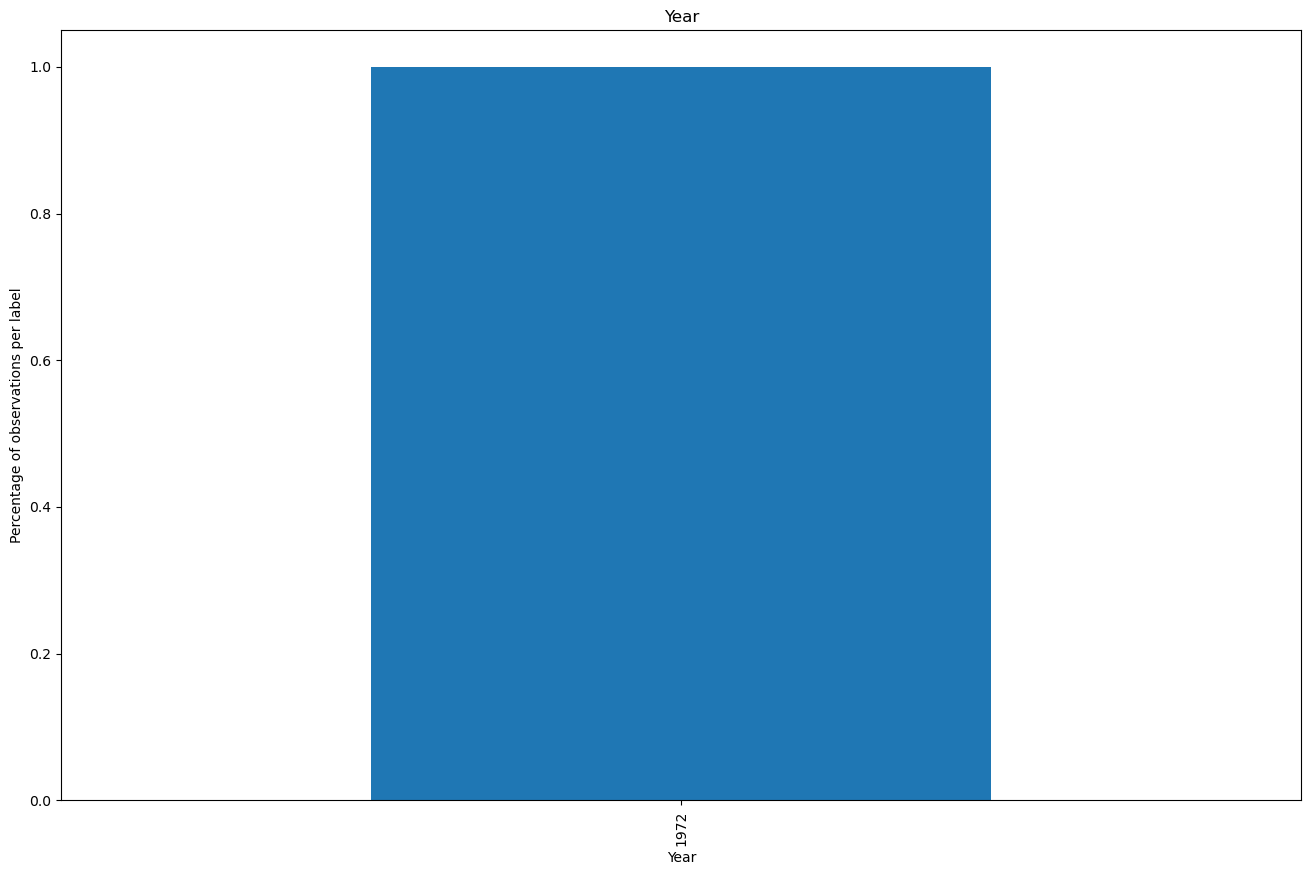

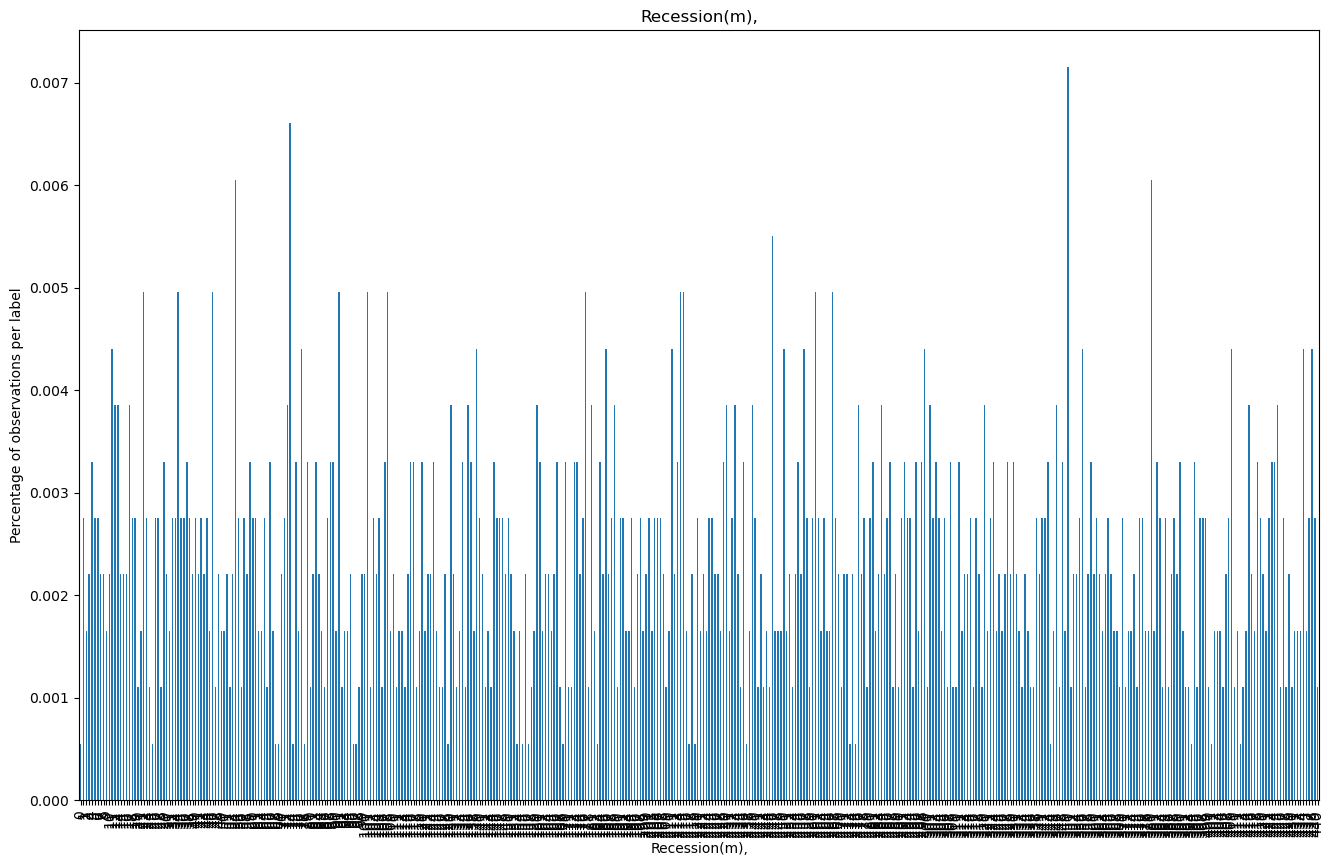

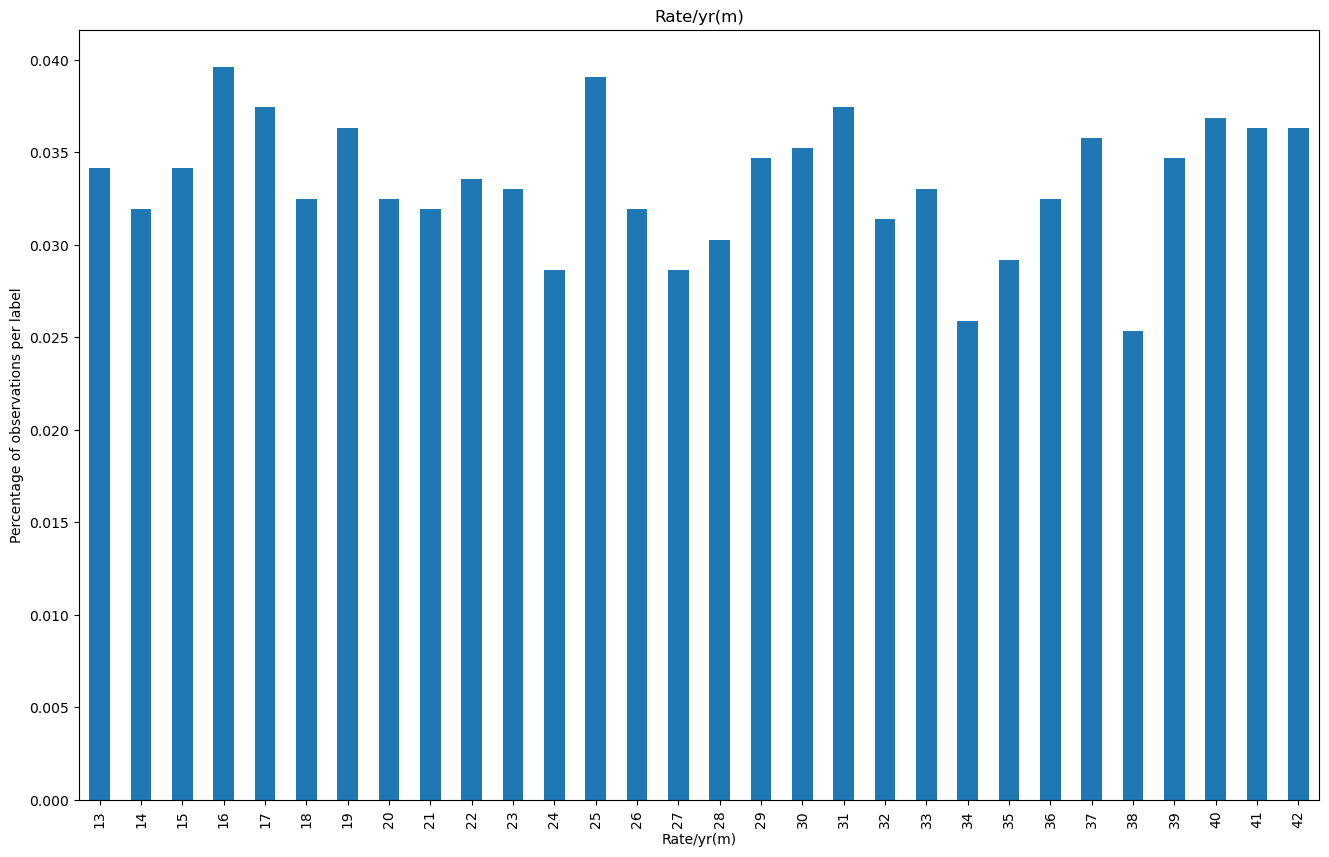

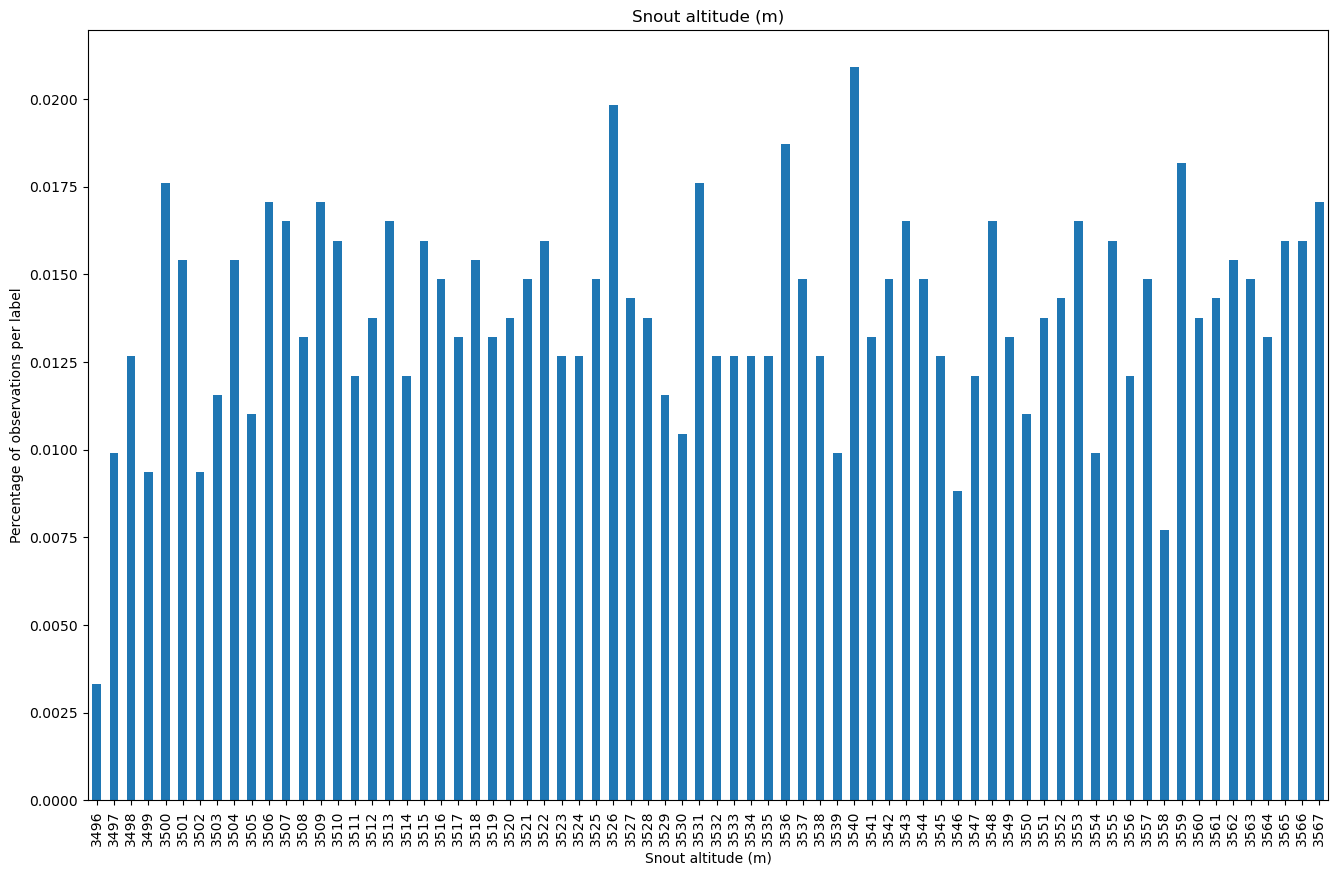

In [18]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()

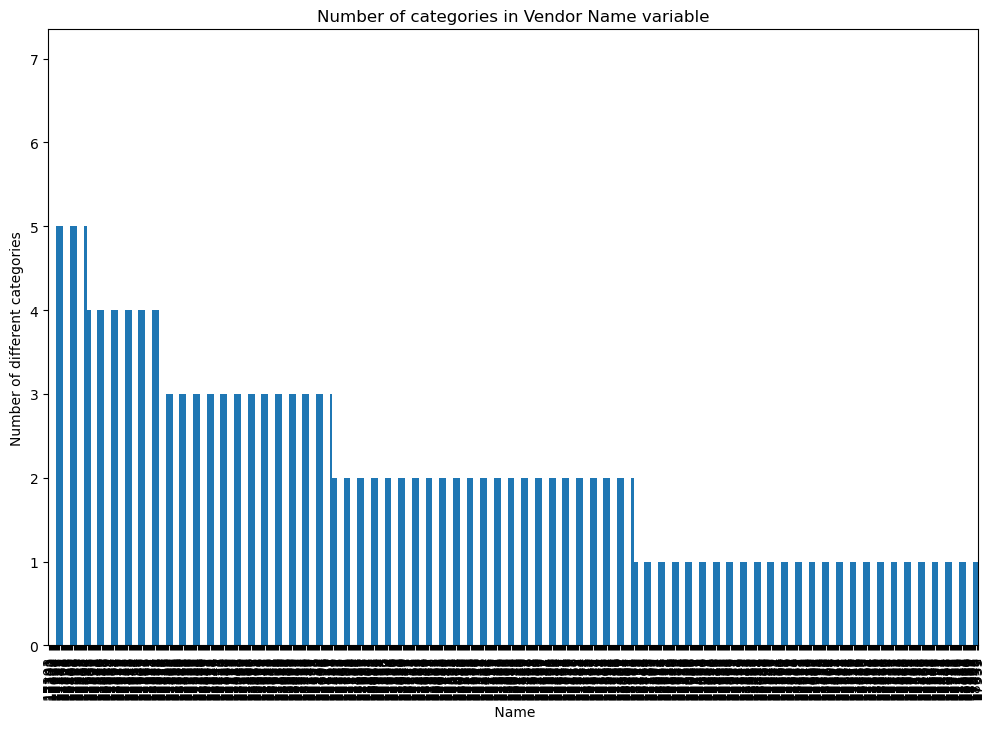

In [19]:
plt.figure(figsize=(12,8))
(df['Maximum length (m))'].value_counts()).plot.bar()
plt.title('Number of categories in Vendor Name variable')
plt.xlabel(' Name')
plt.ylabel('Number of different categories')
plt.show()


In [20]:
df_cat = df.iloc[:,:2]

df_num = df.iloc[:, 2:]

In [21]:
df_num.head()

,"Recession(m),",Rate/yr(m),Snout altitude (m)
0,93,17,3502
1,72,39,3509
2,297,20,3540
3,135,36,3539
4,63,27,3519


In [22]:
X = df_num.iloc[:,0:6]

y = df_num.iloc[:,-1]

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [24]:
X_train.shape, y_train.shape

((1271, 3), (1271,))

In [25]:
X_test.shape, y_test.shape

((546, 3), (546,))

In [26]:
X_train.head()

,"Recession(m),",Rate/yr(m),Snout altitude (m)
42,411,38,3549
905,46,33,3515
962,404,40,3566
1366,315,25,3505
1332,417,31,3497


In [27]:
X_train.describe()

,"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,271.0000","1,271.0000","1,271.0000"
mean,217.6444,27.4217,"3,532.3013"
std,129.1657,8.8073,20.4816
min,0.0000,13.0000,"3,496.0000"
25%,104.5000,20.0000,"3,515.0000"
50%,220.0000,28.0000,"3,532.0000"
75%,326.5000,35.0000,"3,550.0000"
max,440.0000,42.0000,"3,567.0000"


In [28]:
from sklearn.preprocessing import StandardScaler

# instantiate an object scaler
scaler = StandardScaler()

# fit the scaler to the training set and then transform it
X_train = scaler.fit_transform(X_train)

# transform the test set
X_test = scaler.transform(X_test)

In [29]:
from sklearn.linear_model import LinearRegression

# instantiate an object lr
lr = LinearRegression()


# Train the model using the training sets
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = lr.predict(X_test)

In [31]:
lr.predict(X_test)[0:5]

array([3537., 3543., 3560., 3542., 3556.])

In [32]:
print("Number of coefficients:", len(lr.coef_))

print("Estimated coefficients: {}".format(lr.coef_))

print("Estimated intercept: {}".format(lr.intercept_))

Number of coefficients: 3
Estimated coefficients: [ 7.93548931e-16 -4.44089210e-16  2.04734978e+01]
Estimated intercept: 3532.3013375295045


In [33]:
dataset = list(zip(pd.DataFrame(X_train).columns, lr.coef_))

pd.DataFrame(data = dataset, columns = ['Features', 'Estimated Coefficients']).set_index('Features')

,Estimated Coefficients
Features,
0,0.0000
1,-0.0000
2,20.4735


In [34]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value : {:.2f}".format(rmse))

RMSE value : 0.00


In [35]:
from sklearn.metrics import r2_score
print("R2 Score value: {:.2f}".format(r2_score(y_test, y_pred)))

R2 Score value: 1.00


In [36]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))

Training set score: 1.00


In [37]:
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Test set score: 1.00


In [38]:
from sklearn.model_selection import cross_val_score

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(lr, X, y, cv=5)

In [39]:
print(cv_scores.round(4))

[1. 1. 1. 1. 1.]


In [40]:
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores).round(4)))

Average 5-Fold CV Score: 1.0


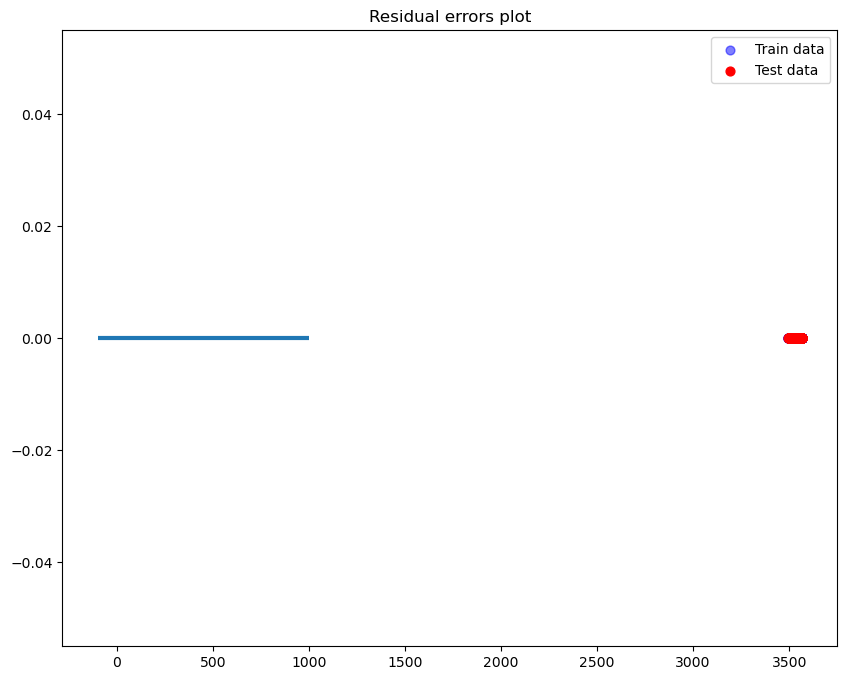

In [41]:
plt.figure(figsize=(10,8))

# plotting residual errors in training data
plt.scatter(lr.predict(X_train), lr.predict(X_train) - y_train, c = 'b', s = 40, label = 'Train data', alpha = 0.5)

# plotting residual errors in test data
plt.scatter(lr.predict(X_test), lr.predict(X_test) - y_test, c = 'r', s = 40, label = 'Test data')

# plotting line for zero residual error
plt.hlines(y = 0, xmin = -100, xmax = 1000, linewidth = 3)

# plotting legend
plt.legend(loc = 'upper right')

# plot title
plt.title("Residual errors plot")

# function to show plot
plt.show()

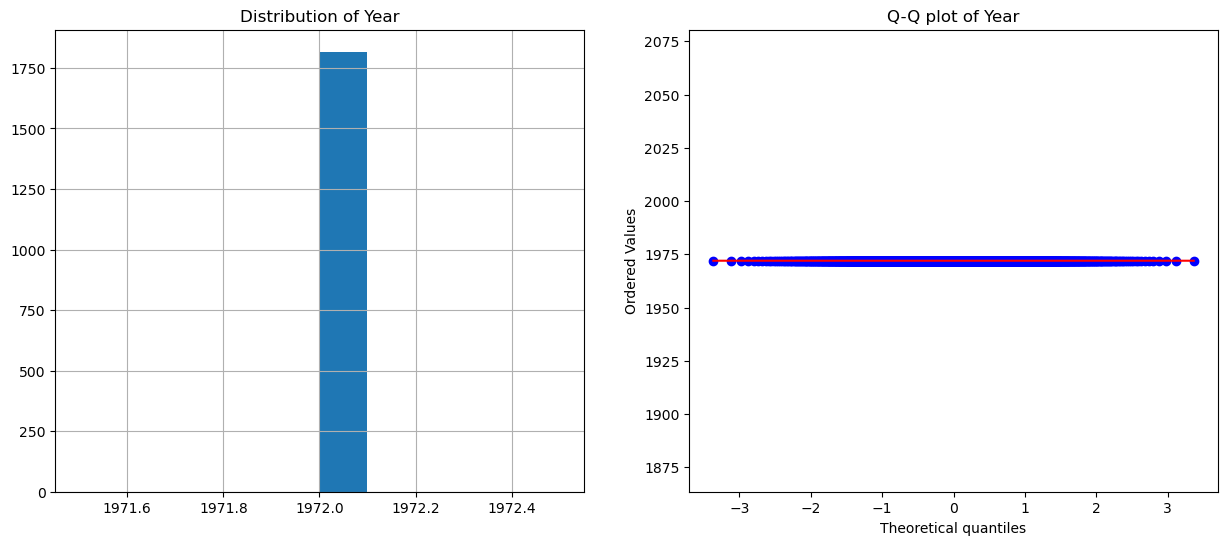

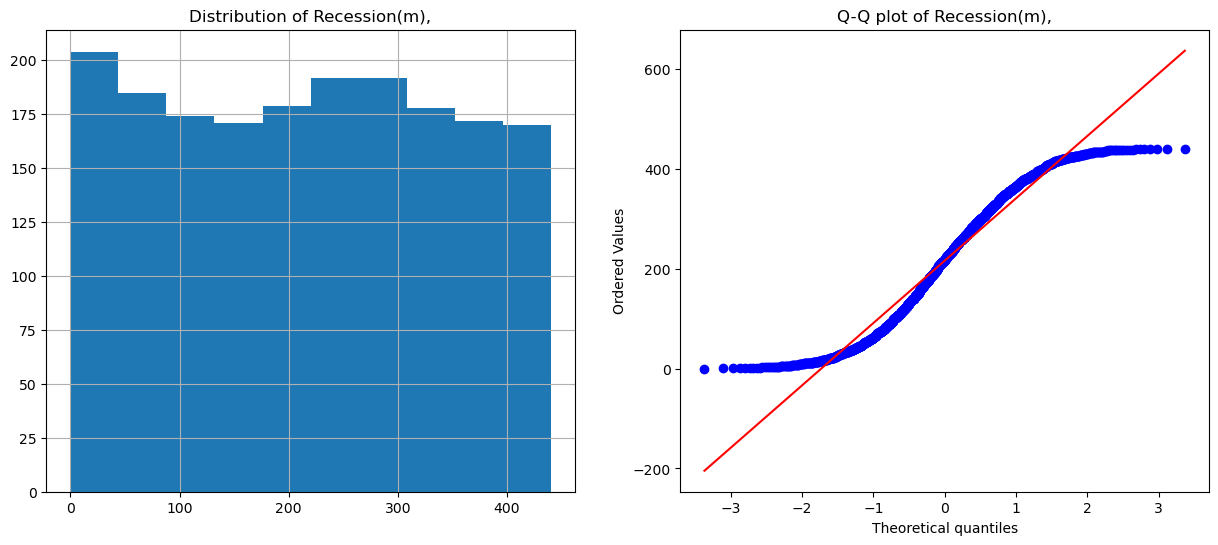

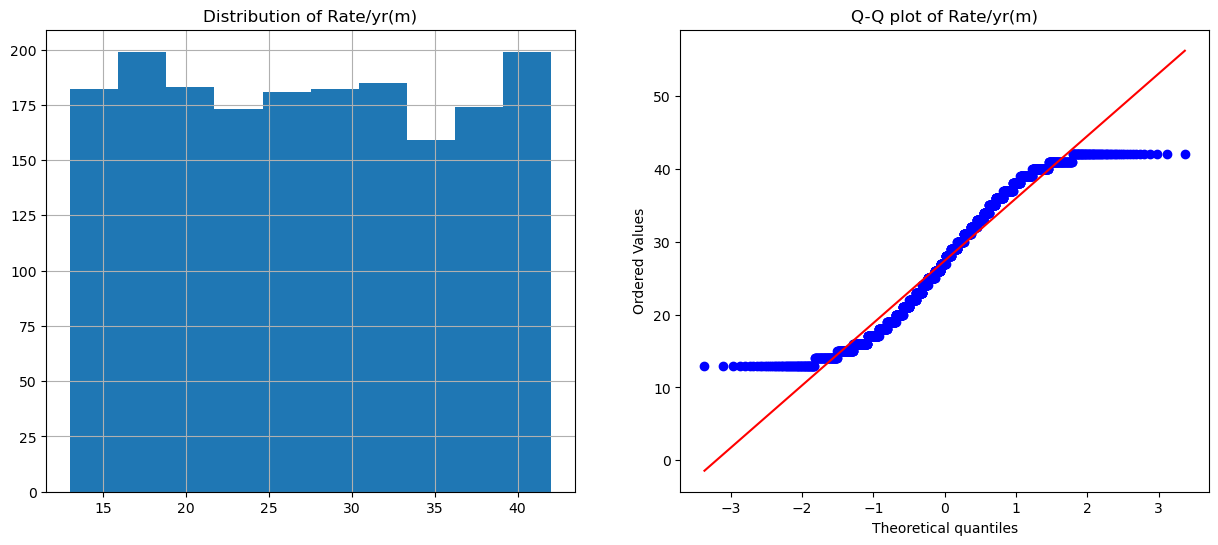

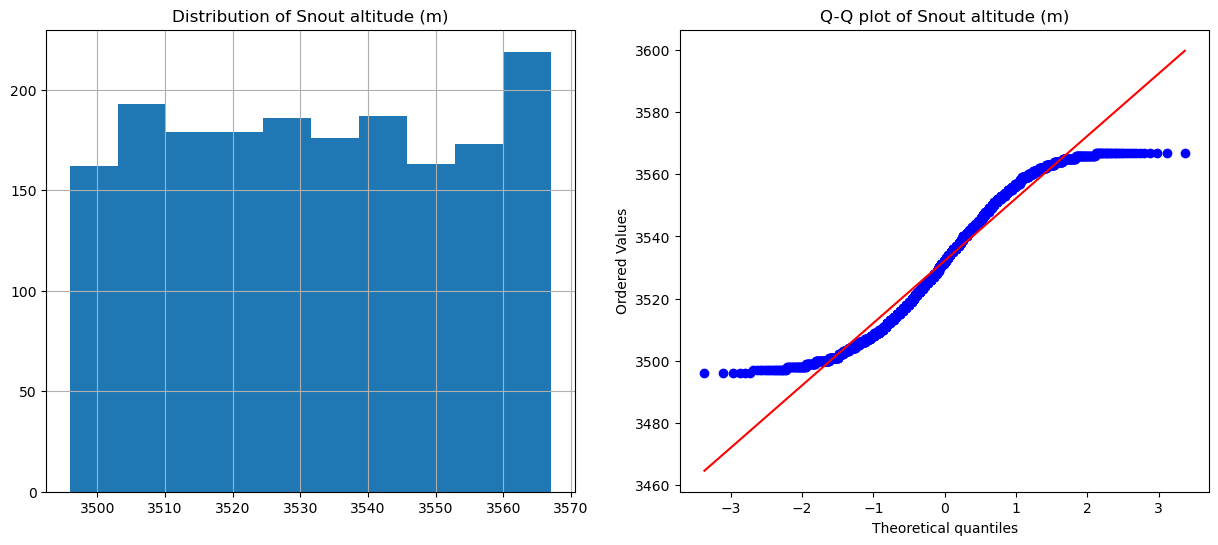

In [42]:
import pylab 
import scipy.stats as stats


for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    
    plt.figure(figsize=(15,6))

    plt.subplot(1, 2, 1)
    df[var].hist()
    plt.title('Distribution of '+ var)

    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=pylab)
    plt.title('Q-Q plot of '+ var)

    plt.show() 